In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import glob
import re
import pandas as pd
import seaborn as sns

In [2]:
files = glob.glob('./logs/test/*.txt')
files

['./logs/test/gcn_cav_20_hv_30_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_20_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_40_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_10_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_50_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_20_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_30_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_50_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_40_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_10_testing_hist.txt']

In [3]:
files.sort()

In [4]:
files

['./logs/test/gcn_cav_20_hv_10_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_20_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_30_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_40_testing_hist.txt',
 './logs/test/gcn_cav_20_hv_50_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_10_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_20_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_30_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_40_testing_hist.txt',
 './logs/test/lstm_cav_20_hv_50_testing_hist.txt']

In [5]:
file_name = files[0]

In [6]:
stat_df = pd.DataFrame(columns=['model_name','num_hv','mean','median','std'])

for file_name in files:
    with open(file_name,'r') as f:
        model_name = file_name.split('/')[-1].split('_')[0]
        number = file_name.split('/')[-1].split('_')[4]
        data = json.load(f)
        raw = np.array(data['episode_reward'])
        mean = raw.mean()
        median = np.median(raw)
        std = raw.std()
        stat_df = stat_df.append({"model_name": model_name,\
                                  "num_hv": number,\
                                  "mean":mean,\
                                  "median":median,\
                                  "std":std,\
                                  }, ignore_index=True)



In [7]:
stat_df

,model_name,num_hv,mean,median,std
0,gcn,10,3968.131248,3882.887591,735.977081
1,gcn,20,3989.528074,4133.128959,949.431067
2,gcn,30,4452.077089,5025.610108,1356.070971
3,gcn,40,5111.421622,4988.621965,664.178256
4,gcn,50,3499.723799,4375.058468,3555.892229
5,lstm,10,3906.912935,3971.627852,850.374725
6,lstm,20,4368.726448,4413.416127,906.385564
7,lstm,30,4243.281442,4440.332177,992.358841
8,lstm,40,3962.874541,4598.059096,1448.110813
9,lstm,50,4775.828156,4841.505841,964.357779


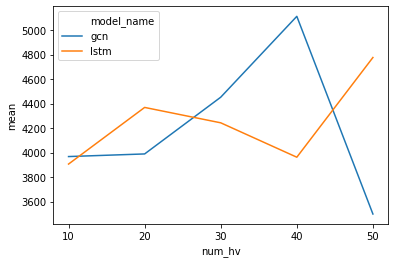

In [10]:
sns.lineplot(x='num_hv',y='mean',hue='model_name',data=stat_df)

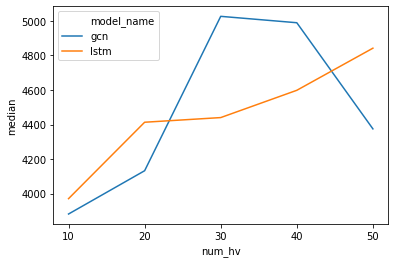

In [11]:
sns.lineplot(x='num_hv',y='median',hue='model_name',data=stat_df)